# NETFLIX

### Tabla de Contenido

- [ ] 1. ¿Cuáles son las variables y tipos de datos presentes en el conjunto de datos?
- [ ] 2. ¿Hay más películas o series en el conjunto de datos?
- [ ] 3. ¿Cuáles son las 10 películas y series más populares según el ranking?
- [ ] 4. ¿Cuál es el país que produce más contenido en comparación con el país que produce menos contenido?
- [ ] 5. ¿Qué país produce más contenido, series o películas?
- [ ] 6. ¿Cuáles son las palabras que más se repiten en la descripción de las películas y series?
- [ ] 7. ¿Cuál es la película y serie con la mayor duración?
- [ ] 8. ¿Cuáles son las 10 películas y series con mayor número de puntaje?
- [ ] 9. ¿Quiénes son los actores y directores de las películas más populares?
- [ ] 10. ¿Quiénes son los directores más populares en cada región?
- [ ] 11. ¿Cuál es la mejor película de cada década según el puntaje de IMDB?


### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# Cargar Datos

## Leer Datasets con Python

In [3]:
df_titles = pd.read_csv('titles.csv')
df_titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782


In [4]:
df_credits = pd.read_csv('credits.csv')
df_credits.head(2)

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR


## Leer Datasets con SQL

In [5]:
df_3 = _deepnote_execute_sql('SELECT *\nFROM \'titles.csv\'\nORDER BY release_year DESC\nLIMIT 2;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_3

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts278785,Lockwood & Co,SHOW,"A tiny startup, run by two teenage boys and a ...",2023,TV-14,44,"['horror', 'thriller', 'action', 'drama', 'fan...",['GB'],1.0,tt13802576,7.4,15929.0,33.360,7.933
1,ts378895,Murdaugh Murders: A Southern Scandal,SHOW,Shocking tragedies shatter a tight-knit South ...,2023,TV-MA,47,"['crime', 'documentation']",['US'],1.0,tt26395768,6.8,2779.0,11.443,6.500


In [6]:
df_2 = _deepnote_execute_sql('SELECT *\nFROM \'credits.csv\'\nLIMIT 2;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_2

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR


# Colecta y validación de datos

## Utilizando Python

In [7]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [8]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81355 entries, 0 to 81354
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  81355 non-null  int64 
 1   id         81355 non-null  object
 2   name       81355 non-null  object
 3   character  70532 non-null  object
 4   role       81355 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


### ¿Cuántas columnas y filas tenemos en el conjunto de datos?

In [9]:
print(f"Filas: {df_titles.shape[0]}\nColumnas: {df_titles.shape[1]}")

Filas: 6137
Columnas: 15


In [10]:
print(f"Filas: {df_credits.shape[0]}\nColumnas: {df_credits.shape[1]}")

Filas: 81355
Columnas: 5


### ¿Existen valores nulos explícitos en el conjunto de datos?

In [11]:
(
    df_titles
    .isnull()
    .any()
)

id                      False
title                   False
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
dtype: bool

In [12]:
(
    df_credits
    .isnull()
    .any()
)

person_id    False
id           False
name         False
character     True
role         False
dtype: bool

### ¿Cuántos valores nulos tenemos por cada variable?

In [13]:
(
    df_titles
    .isnull()
    .sum()
)

id                         0
title                      0
type                       0
description               23
release_year               0
age_certification       2743
runtime                    0
genres                     0
production_countries       0
seasons                 3831
imdb_id                  396
imdb_score               468
imdb_votes               484
tmdb_popularity           76
tmdb_score               252
dtype: int64

In [14]:
(
    df_credits
    .isnull()
    .sum()
)

person_id        0
id               0
name             0
character    10823
role             0
dtype: int64

### ¿Hay valores duplicados?

In [15]:
duplicados = df_titles[df_titles.duplicated()]
duplicados



,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [16]:
duplicados = df_credits[df_credits.duplicated()]
duplicados

,person_id,id,name,character,role


### ¿Cuál es la proporción de valores nulos por cada variable?

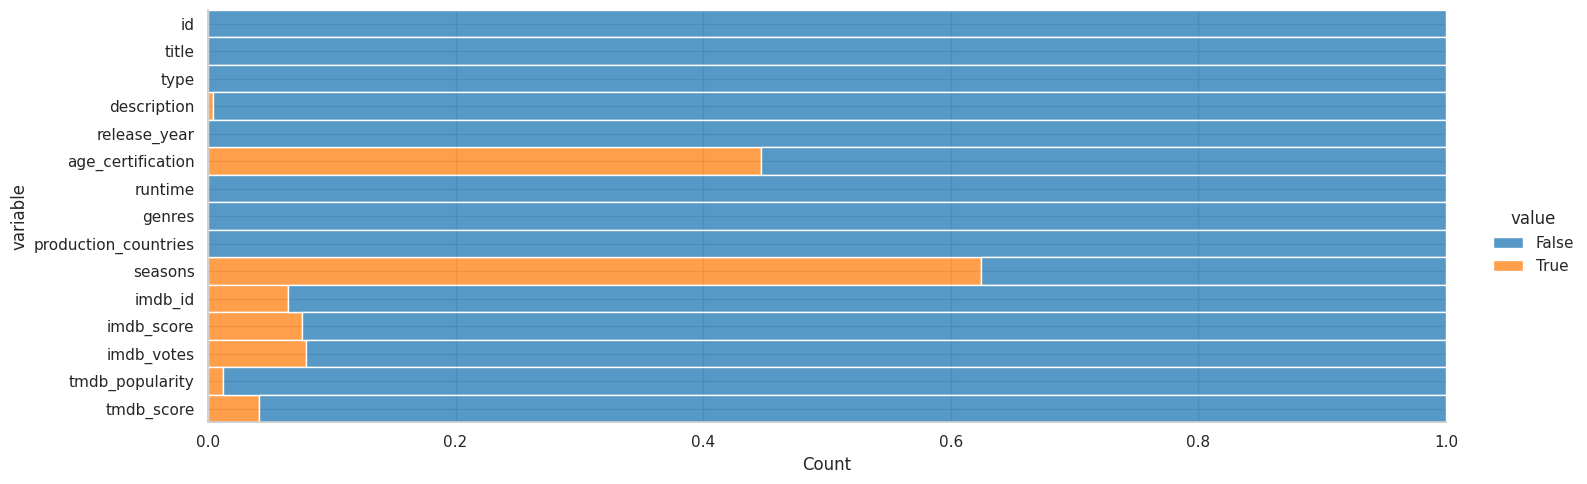

In [19]:
(
    df_titles
    .isnull()
    .melt()
    .pipe( # Función de Pandas para graficar.
        lambda df: (
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 3
            )
        )
    )
);

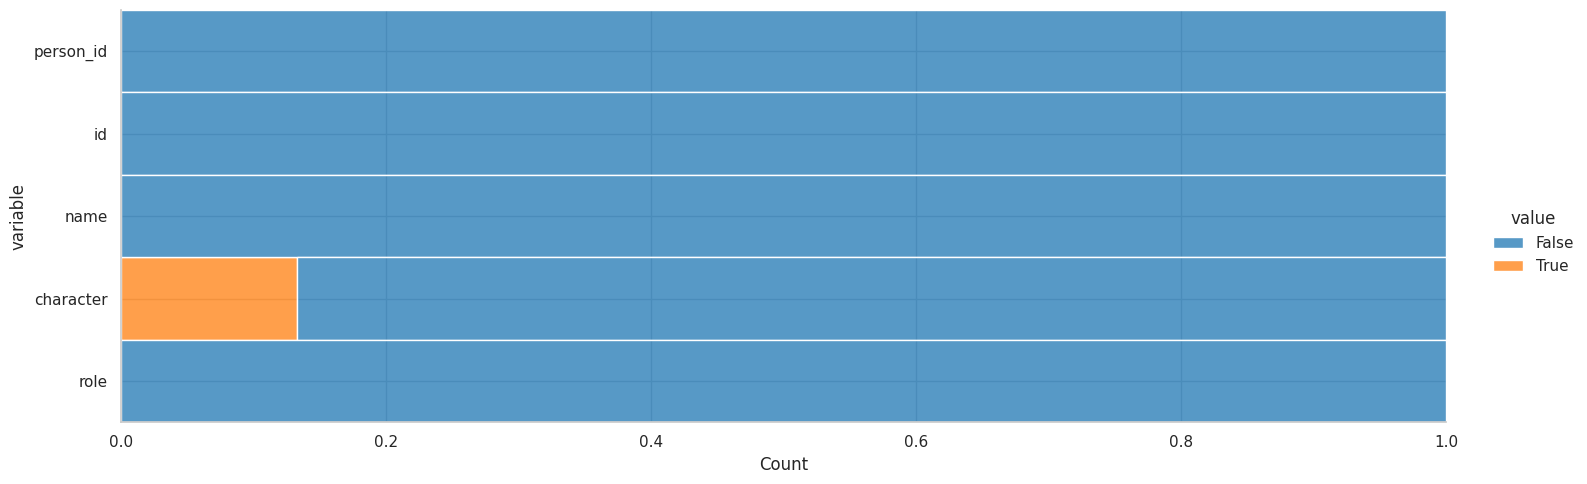

In [20]:
(
    df_credits
    .isnull()
    .melt()
    .pipe( # Función de Pandas para graficar.
        lambda df: (
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 3
            )
        )
    )
);

### ¿Cómo podemos visualizar los valores nulos por cada fila en todo el conjunto de datos?

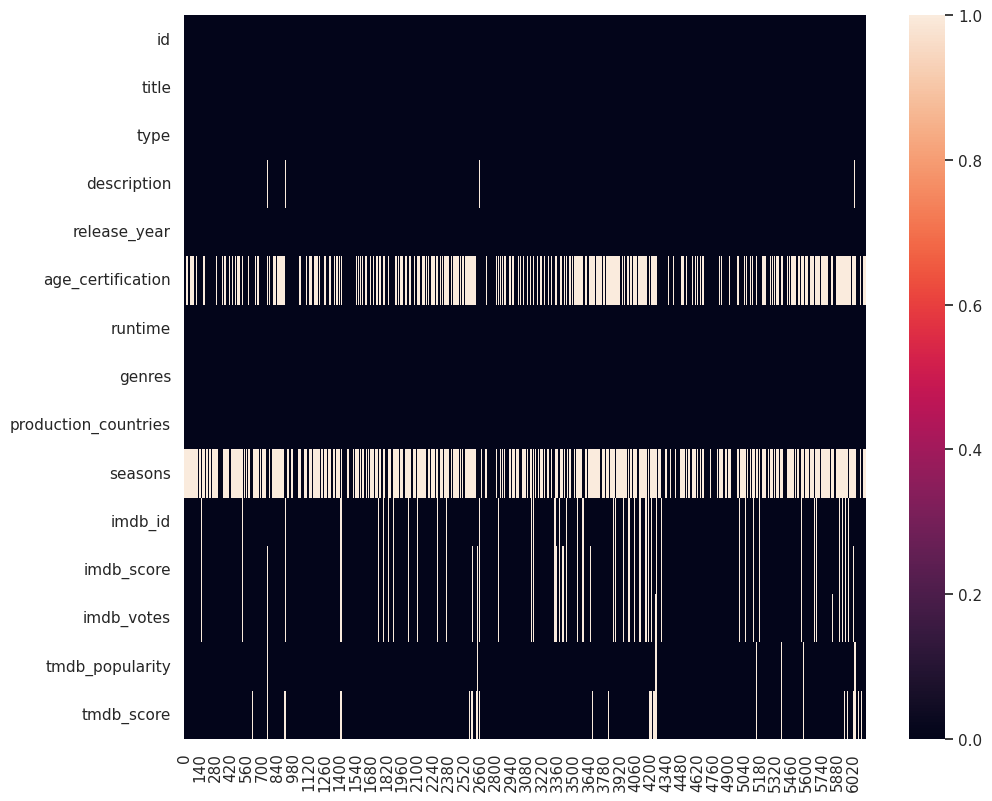

In [21]:
(
    df_titles
    .isnull()
    .transpose()
    .pipe( # Función de Pandas para graficar cada columa.
        lambda df: (
            sns.heatmap(
                data = df
            )
        )
    )
);

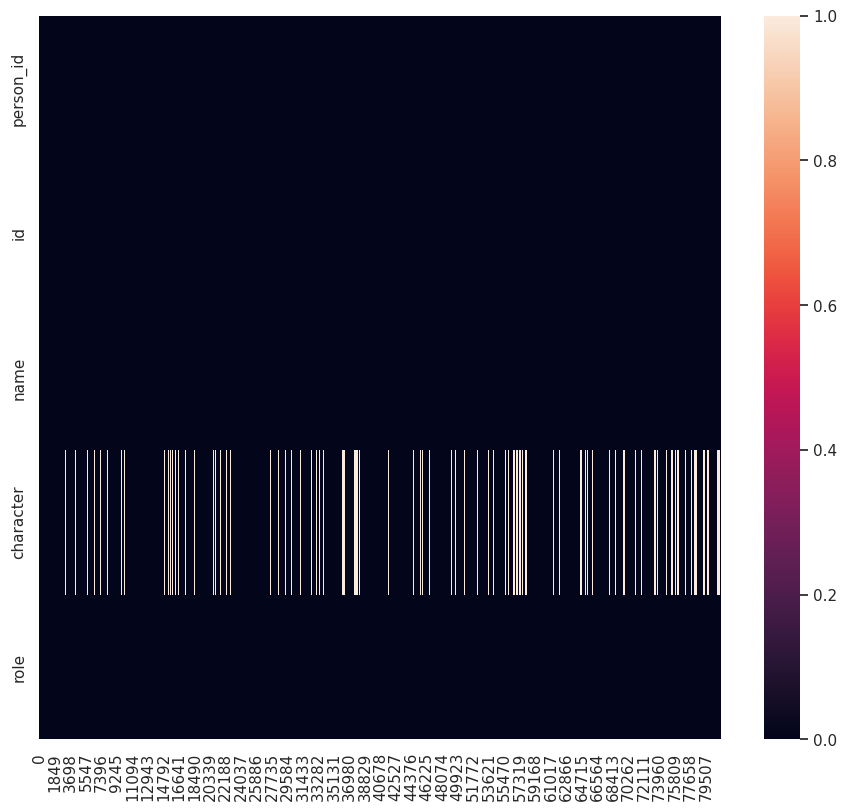

In [22]:
(
    df_credits
    .isnull()
    .transpose()
    .pipe( # Función de Pandas para graficar cada columa.
        lambda df: (
            sns.heatmap(
                data = df
            )
        )
    )
);

## Utilizando SQL

### ¿Cuántos valores nulos tenemos por cada variable?

In [82]:
df_21 = _deepnote_execute_sql('SELECT \n    COUNT(*) - COUNT(id) AS id,\n    COUNT(*) - COUNT(title) AS title,\n    COUNT(*) - COUNT(type) AS type,\n    COUNT(*) - COUNT(description) AS description,\n    COUNT(*) - COUNT(release_year) AS release_year,\n    COUNT(*) - COUNT(age_certification) AS age_certification,\n    COUNT(*) - COUNT(runtime) AS runtime,\n    COUNT(*) - COUNT(genres) AS genres,\n    COUNT(*) - COUNT(production_countries) AS production_countries,\n    COUNT(*) - COUNT(seasons) AS seasons,\n    COUNT(*) - COUNT(imdb_id) AS imdb_id,\n    COUNT(*) - COUNT(imdb_score) AS imdb_score,\n    COUNT(*) - COUNT(imdb_votes) AS imdb_votes,\n    COUNT(*) - COUNT(tmdb_popularity) AS tmbd_popularity,\n    COUNT(*) - COUNT(tmdb_score) AS tmdb_score,\nFROM \'titles.csv\';', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_21

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmbd_popularity,tmdb_score
0,0,0,0,23,0,2743,0,0,0,3831,396,468,484,76,252


In [87]:
df_22 = _deepnote_execute_sql('SELECT\n    COUNT(*) - COUNT(person_id) AS person_id,\n    COUNT(*) - COUNT(id) AS id,\n    COUNT(*) - COUNT(name) AS name,\n    COUNT(*) - COUNT(character) AS character,\n    COUNT(*) - COUNT(role) AS role\nFROM \'credits.csv\';', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_22

,person_id,id,name,character,role
0,0,0,0,10823,0


# Categorizar las varibles

## Utilizando Python

### Todas nuestras varibles

In [24]:
df_credits.head()

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR


In [25]:
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246


### Variables númericas

In [26]:
(
    df_titles.describe(include=np.number)
    .T
)

,count,mean,std,min,25%,50%,75%,max
release_year,6137.0,2017.371843,6.603620,1945.000000,2017.000,2019.000,2021.000,2023.000
runtime,6137.0,76.381946,39.086828,0.000000,44.000,80.000,105.000,225.000
seasons,2306.0,2.106678,2.716844,1.000000,1.000,1.000,2.000,44.000
imdb_score,5669.0,6.540942,1.135944,1.500000,5.800,6.600,7.300,9.600
imdb_votes,5653.0,21150.290819,92542.251929,5.000000,517.000,2095.000,8884.000,2684317.000
tmdb_popularity,6061.0,19.267196,51.291407,0.009442,3.381,7.580,16.523,1078.637
tmdb_score,5885.0,6.633194,1.251610,0.500000,6.000,6.791,7.400,10.000


In [27]:
(
    df_credits.describe(include=np.number)
    .T
)

,count,mean,std,min,25%,50%,75%,max
person_id,81355.0,626905.944982,738389.784016,7.0,58834.0,242508.0,1037428.0,2771013.0


### Varibles Categoricas

In [28]:
(
    df_titles.describe(include='object')
    .T
)

,count,unique,top,freq
id,6137,6137,tm166810,1
title,6137,6089,Zero,2
type,6137,2,MOVIE,3831
description,6114,6112,"Away from school, during the winter holidays, ...",2
age_certification,3394,12,TV-MA,1018
genres,6137,1712,['comedy'],516
production_countries,6137,438,['US'],1981
imdb_id,5741,5741,tt7472352,1


In [29]:
(
    df_credits.describe(include='object')
    .T
)

,count,unique,top,freq
id,81355,5788,tm32982,209
name,81355,56438,Shah Rukh Khan,38
character,70532,48737,Self,2736
role,81355,2,ACTOR,76570


Transformaremos las columnas de tipo `object` a `category`

In [30]:
df_titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782


In [31]:

(
    df_titles
    .select_dtypes(include='object')
    .astype('category')
)


,id,title,type,description,age_certification,genres,production_countries,imdb_id
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,TV-MA,['documentation'],['US'],NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",PG,"['drama', 'sport']",['US'],tt0075148
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,PG,"['romance', 'comedy']",['US'],tt0077631
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,PG,"['crime', 'drama', 'comedy', 'music']",['US'],tt0070735
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,PG,"['drama', 'sport']",['US'],tt0079817
...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,NaN,"['family', 'comedy']",['KW'],NaN
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",NaN,['documentation'],['TR'],tt26349328
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,NaN,['comedy'],['US'],tt21033382
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,NaN,['drama'],['NG'],tt14922926


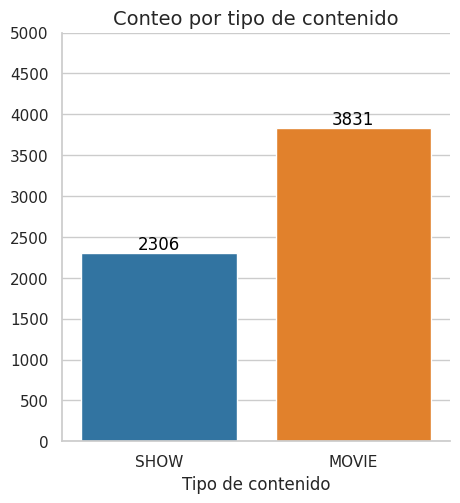

In [32]:
# Crear el gráfico de conteo de tipo de contenido
g = sns.catplot(
    data=df_titles,
    x='type',
    kind='count'
)

# Agregar etiquetas a las barras de la gráfica
for ax in g.axes.flat:   # Para cada eje en la gráfica
    for p in ax.patches: # Para cada barra en el eje

        # Obtener la posición x y el ancho de la barra
        x_pos = p.get_x() + p.get_width() / 2.
        # Obtener la altura de la barra y convertirla a un número entero
        height = int(p.get_height())

        # Agregar la etiqueta de la altura en el centro de la barra
        plt.text(x_pos, height, '%d' % height, fontsize=12, color='black', ha='center', va='bottom') # %d' % height: convertir a numero entero.

# Configurar las etiquetas de los ejes
plt.xlabel('Tipo de contenido', fontsize=12)
plt.ylabel('')
plt.title('Conteo por tipo de contenido', fontsize=14)

# Limite del axis Y
plt.ylim(0, 5000)
plt.yticks(range(0, 5001, 500))

plt.show()


## Utilizando SQL

In [33]:
df_6 = _deepnote_execute_sql('SELECT\n    type,\n    COUNT(*) AS quantity\nFROM \'titles.csv\'\nGROUP BY type\nORDER BY quantity DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_6

,type,quantity
0,MOVIE,3831
1,SHOW,2306


In [95]:
DeepnoteChart(df_6, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"type","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"quantity","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

# Lidiar con los datos faltantes
Identifica y maneja los valores faltantes en los datos. Esto puede incluir la eliminación de filas con valores faltantes, la imputación de valores faltantes o la creación de variables dummy para indicar los valores faltantes.

## Sustitución global de datos nan

In [35]:
df_titles = (
    df_titles
    .replace(
        to_replace=[np.nan],
        value=0
    )
)

## Exiten valores faltantes implicitos 

In [36]:
df_titles.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,0,0.0,0.0,0.601,0.000
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],0.0,tt0075148,8.1,588100.0,106.361,7.782


## Codificacion de valores faltante

In [37]:
a = (
    df_titles
    .select_dtypes(include=['object', np.number])
    .apply(pd.unique)
    .to_dict()
)

a.keys()
a["seasons"]

array([ 1.,  0.,  4.,  9., 24., 13., 10., 44., 21., 25.,  8., 33., 29.,
        7., 11.,  5.,  6., 14., 12., 19., 20.,  3., 15., 34., 16., 31.,
        2.])

# Manejar los valores atípicos y relaciónes
Identifica y maneja los valores atípicos en los datos. Esto puede incluir la eliminación de valores atípicos, la imputación de valores atípicos o la transformación de los datos para reducir la influencia de los valores atípicos y crea relaciónes entre la variables.

# Crear nuevas variables
Crea nuevas variables a partir de los datos existentes si es necesario para responder a las preguntas de investigación. Esto puede incluir la creación de variables dummy, la agregación de variables existentes o la normalización de los datos.

## Utilizando Python

### 3. ¿Cuáles son las 10 películas y series más populares según el ranking?

In [38]:
top_show_df = (
    df_titles[["title","imdb_score", "type"]]
    .sort_values(by="imdb_score", ascending=False)
    .query(expr="type == 'SHOW'")
    .head(10)
)

top_movies_df = (
    df_titles[["title","imdb_score", "type"]]
    .sort_values(by="imdb_score", ascending=False)
    .query(expr="type == 'MOVIE'")
    .head(10)
)

/tmp/ipykernel_88/2854316344.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(labels)


Text(0, 0.5, '')

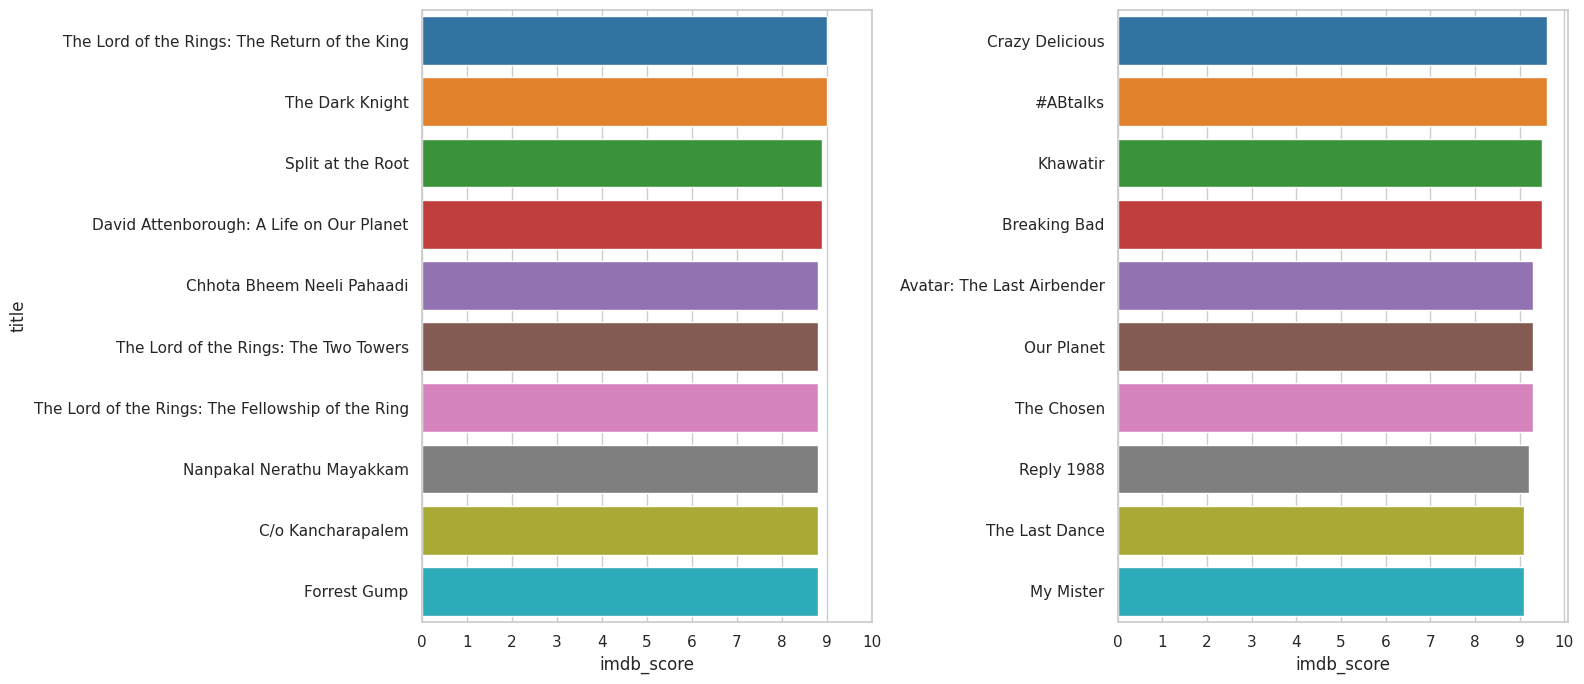

In [39]:
# Crear una figura con dos subplots (uno para las películas y otro para las series)
# y compartir el eje y entre ellos
fig, ax = plt.subplots(ncols=2, figsize=(16, 7), tight_layout=True)

# Crear un gráfico de barras para las películas
sns.barplot(
    data=top_movies_df,
    x="imdb_score", # Puntuaciones IMDb en el eje x
    y="title", # Títulos de las películas en el eje y
    ax=ax[0] # Usar el primer subplot
)

# Crear un gráfico de barras para las series
sns.barplot(
    data=top_show_df,
    x="imdb_score", # Puntuaciones IMDb en el eje x
    y="title", # Títulos de las series en el eje y
    ax=ax[1] # Usar el segundo subplot
);

# Establecer las etiquetas y ubicaciones de los ticks del eje x
labels = range(0, 11)
ticks = range(0, 11)

# Asignar las etiquetas y ticks a ambos gráficos
for a in ax:
    a.set_xticklabels(labels)
    a.set_xticks(ticks)

plt.ylabel(None)


### 4. ¿Cuál es el país que produce más contenido en comparación con el país que produce menos contenido?

In [40]:
max_min_production_df = (
    df_titles
    .production_countries.astype("category")
    .value_counts()
    .reset_index(name = "count")
    .query("count == count.max() or count == count.min()")
    .sort_values(["count", "index"], ascending=False)
    .head(2)
    .rename(columns={"index": "countries"})
    .assign(countries=lambda x: x.countries.str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.replace("'", "", regex=False))
)

max_min_production_df

,countries,count
0,US,1981
145,ZW,1


### 5. ¿Qué país produce más contenido, series o películas?

In [41]:
countries_with_more_series_or_movies = (
    df_titles
    .groupby(by=["production_countries", "type"])["title"].count()
    .sort_values(ascending=False)
    .reset_index()
    .assign(production_countries=lambda x: x.production_countries.str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.replace("'", "", regex=False))
    .head(5)
    .rename(columns=({"title": "count"}))
)

countries_with_more_series_or_movies

,production_countries,type,count
0,US,MOVIE,1143
1,US,SHOW,838
2,IN,MOVIE,576
3,KR,SHOW,212
4,JP,SHOW,175


### 6. ¿Cuáles son las palabras que más se repiten en la descripción de las películas y series?

In [42]:
# crear una lista de las descripciones y agregar todas las palabras en una lista vacia

In [43]:
# Cambiar el tipo de dato de description
df_titles['description'] = df_titles['description'].astype(str)

(
    df_titles.iloc[:5, :4]
)


,id,title,type,description
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo..."
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...


Crear función para las palabras repetidas

In [136]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

def palabras_mas_repetidas(df):

    # Obtener todas las palabras en minúsculas
    palabras = []
    for descripcion in df['description']:
        palabras += nltk.word_tokenize(descripcion.lower())
        
    # Eliminar las palabras de parada (stopwords) y signos de puntuación
    palabras = [palabra for palabra in palabras if palabra.isalnum() and palabra not in stopwords.words('english')]
    
    # Calcular la frecuencia de cada palabra
    frecuencia = nltk.FreqDist(palabras)
    
    # Crear un DataFrame con las palabras y su frecuencia
    df_frecuencias = pd.DataFrame(list(frecuencia.items()), columns=['Palabra', 'Frecuencia'])
    
    # Ordenar el DataFrame por frecuencia descendente
    df_frecuencias = df_frecuencias.sort_values('Frecuencia', ascending=False)
    
    # returnar las 10 palabras más frecuentes
    return df_frecuencias



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Obtener las palabras más repetidas de la columna `descripción` de las peliculas

In [137]:
frecuencias = palabras_mas_repetidas(df_titles)

Cambiar el tipo de datos la columna `Palabra`

In [46]:
frecuencias.Palabra = frecuencias.Palabra.astype("category")
frecuencias

,Palabra,Frecuencia
90,life,907
3,world,647
52,love,632
299,family,623
373,new,603
209,one,587
173,young,561
204,two,503
468,story,424
63,friends,423


Graficar las palabras más repetidas

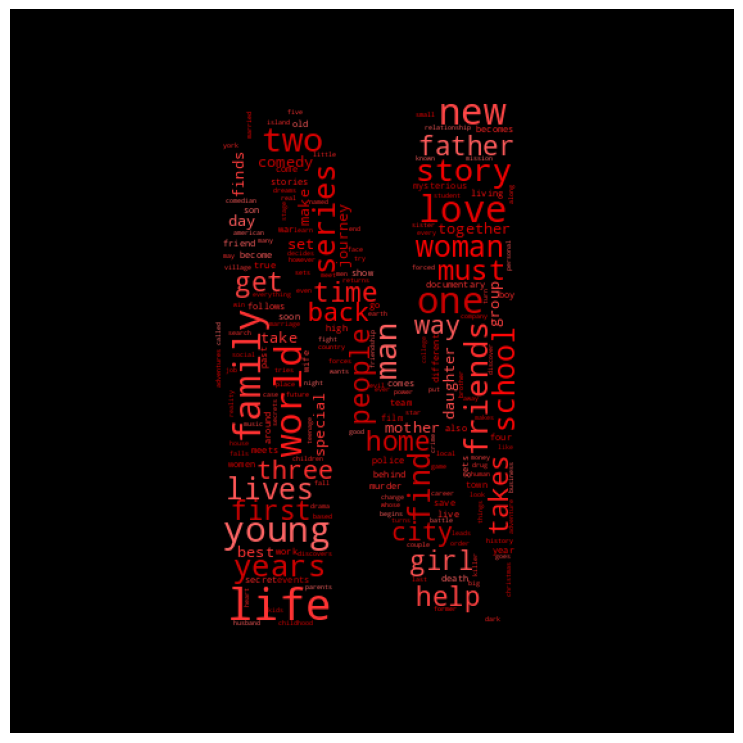

In [158]:
import random

def wordcloud(data, path_logo, background_color, dpi, export_name):    
    ''' 
    Crea una nube de palabras a partir de los argumentos indicados. 
    
    -----------
    Parámetros: 
    -----------
    ::param:    data = diccionario con las frecuencia de las palabras del texto, output de la función preprocessing()
    ::param:    path_logo == path de la imagen que dará forma a la nube de palabras
    ::param:    background_color == color del fondo de la nube de palabras
    ::param:    dpi == resolución o calidad de imagen esperada en por la imagen, dpi 300 se considera de buena calidad 
    ::param:    export_name == el nombre que tendrá la imagen exportada 
    '''
    mask = np.array(Image.open(path_logo))
    mask[mask == 1] = 255

    wordcloud = WordCloud(background_color = background_color,
                        max_words = 500, 
                        width=1000, 
                        height=500, 
                        mask = mask, 
                        max_font_size=160,
                        random_state=1).generate_from_frequencies(data)

    def orange_colors(word, font_size, position, orientation, random_state=None, **kwargs):
        return f"hsl(32, 93%, {random.randint(40,70)}%)"
    
    def red_colors(word, font_size, position, orientation, random_state=None, **kwargs):
        return f"hsl(0, 100%, {random.randint(40,70)}%)"

    plt.imshow(wordcloud.recolor(color_func=red_colors, random_state=4))

    # Imprimir
    plt.axis("off")
    plt.savefig(export_name, format="png", dpi=dpi)
    plt.show()


# Obtener las frecuencias de cada palabra en el DataFrame
word_freq = dict(zip(frecuencias.Palabra, frecuencias.Frecuencia))

# Llamar la función wordcloud
wordcloud(data=word_freq, 
          path_logo="Netflix_logo.jpg", 
          background_color="black",
          dpi=300, 
          export_name="Netflix.png")


In [116]:
frecuencias.Frecuencia

90     907
3      647
52     632
299    623
373    603
209    587
173    561
204    503
468    424
63     423
Name: Frecuencia, dtype: int64

### 7. ¿Cuál es la película y serie con la mayor duración?

In [48]:
(
    df_titles[["title", "type", "runtime"]]
    .query('type == "MOVIE" and runtime == runtime.max() or type == "SHOW" and runtime >  200')

)


,title,type,runtime
486,A Lion in the House,MOVIE,225
5352,A Sinister Sect: Colonia Dignidad,SHOW,209


### 8. ¿Cuáles son las 10 películas y series con mayor número de puntaje?

In [49]:
top_10_movies = (
    df_titles[["title", "imdb_score", "type"]]
    .query(" type == 'MOVIE'")
    .sort_values(by="imdb_score", ascending=False)
)

top_10_shows = (
    df_titles[["title", "imdb_score", "type"]]
    .query(" type == 'SHOW'")
    .sort_values(by="imdb_score", ascending=False)
)

top_10_shows
# top_10_movies

,title,imdb_score,type
2343,Crazy Delicious,9.6,SHOW
2634,#ABtalks,9.6,SHOW
529,Khawatir,9.5,SHOW
186,Breaking Bad,9.5,SHOW
3186,Our Planet,9.3,SHOW
...,...,...,...
3413,Transformers: War for Cybertron: Siege,0.0,SHOW
3412,Babies,0.0,SHOW
3847,Bhaag Beanie Bhaag,0.0,SHOW
4995,Transformers: War for Cybertron: Kingdom,0.0,SHOW


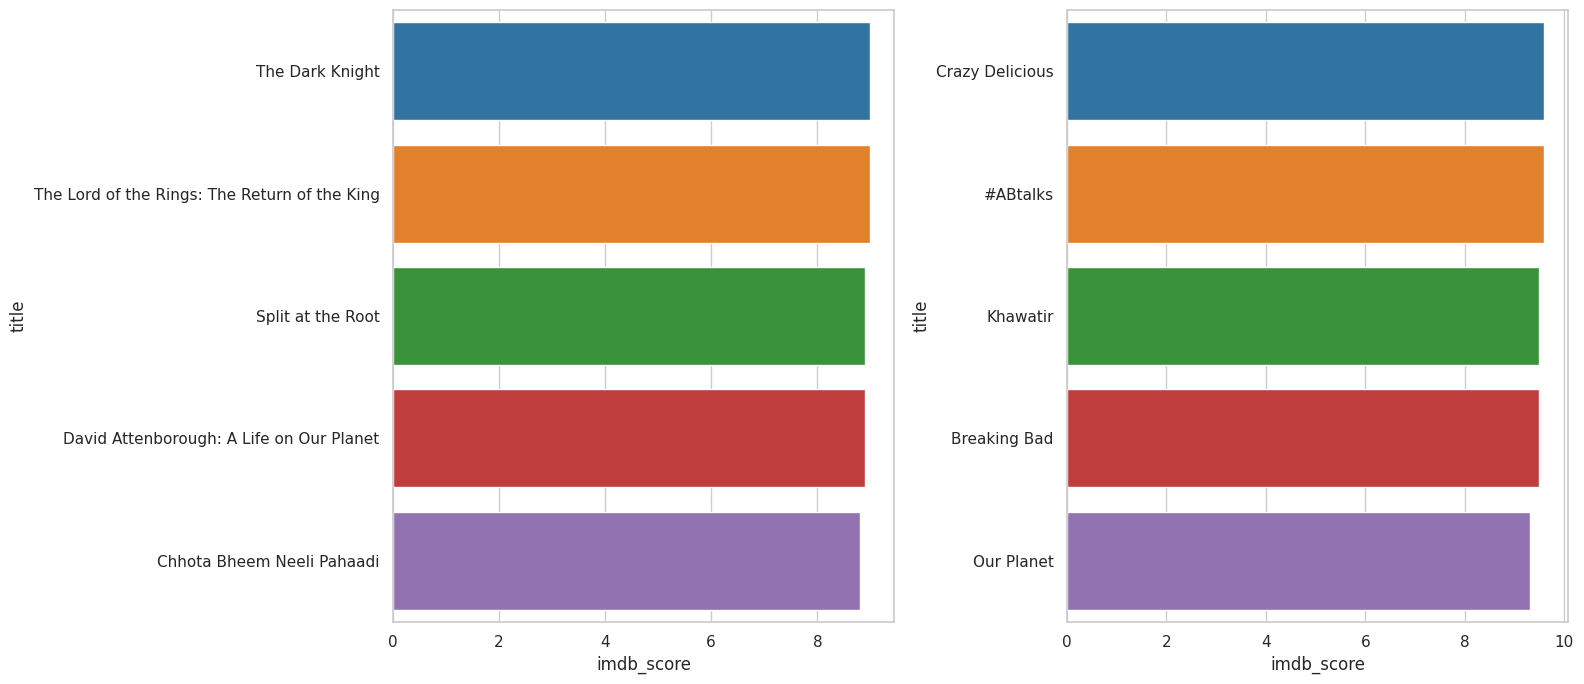

In [96]:
# Crear una figura con dos subplots (uno para las películas y otro para las series)
# y compartir el eje y entre ellos
fig, ax = plt.subplots(ncols=2, figsize=(16, 7), tight_layout=True)

# Crear un gráfico de barras para las películas
sns.barplot(
    data=top_10_movies.head(),
    x="imdb_score", # Puntuaciones IMDb en el eje x
    y="title", # Títulos de las películas en el eje y
    ax=ax[0] # Usar el primer subplot
)

# Crear un gráfico de barras para las series
a = sns.barplot(
    data=top_10_shows.head(),
    x="imdb_score", # Puntuaciones IMDb en el eje x
    y="title", # Títulos de las series en el eje y
    ax=ax[1] # Usar el segundo subplot
);

# Establecer las etiquetas y ubicaciones de los ticks del eje x
labels = range(0, 11)
ticks = range(0, 11)

# Agregar etiquetas a las barras
for barra in a.patches:
    x = barra.get_width()
    y = barra.get_y() + barra.get_height() / 2
    etiqueta = f"{int(x)}"
    grafico_barras.text(x, y, etiqueta, ha='left', va='center', color='black')

### 9. ¿Quiénes son los actores de las películas más populares?

In [51]:

top_actors = (
    pd.merge(df_credits, df_titles, on="id")[["title", "type", "name", "role", "tmdb_popularity"]]
    .sort_values(by= "tmdb_popularity",ascending=False)
    
    .query("type == 'MOVIE'")
)

top_actors

,title,type,name,role,tmdb_popularity
59092,Narvik,MOVIE,Tom Espen Pedersen,ACTOR,779.484
59096,Narvik,MOVIE,Morten Skillingstad Larsen,ACTOR,779.484
59091,Narvik,MOVIE,Anders Wang,ACTOR,779.484
59095,Narvik,MOVIE,Lars Oddmund Sandvik,ACTOR,779.484
59093,Narvik,MOVIE,Roy Boquist Hestdahl,ACTOR,779.484
...,...,...,...,...,...
58287,The Blue Whale,MOVIE,Alaa Morsi,DIRECTOR,0.000
58276,The Blue Whale,MOVIE,Nour ElKadeiki,ACTOR,0.000
58275,The Blue Whale,MOVIE,Nada Bahgat,ACTOR,0.000
58274,The Blue Whale,MOVIE,Randa ElBehairy,ACTOR,0.000


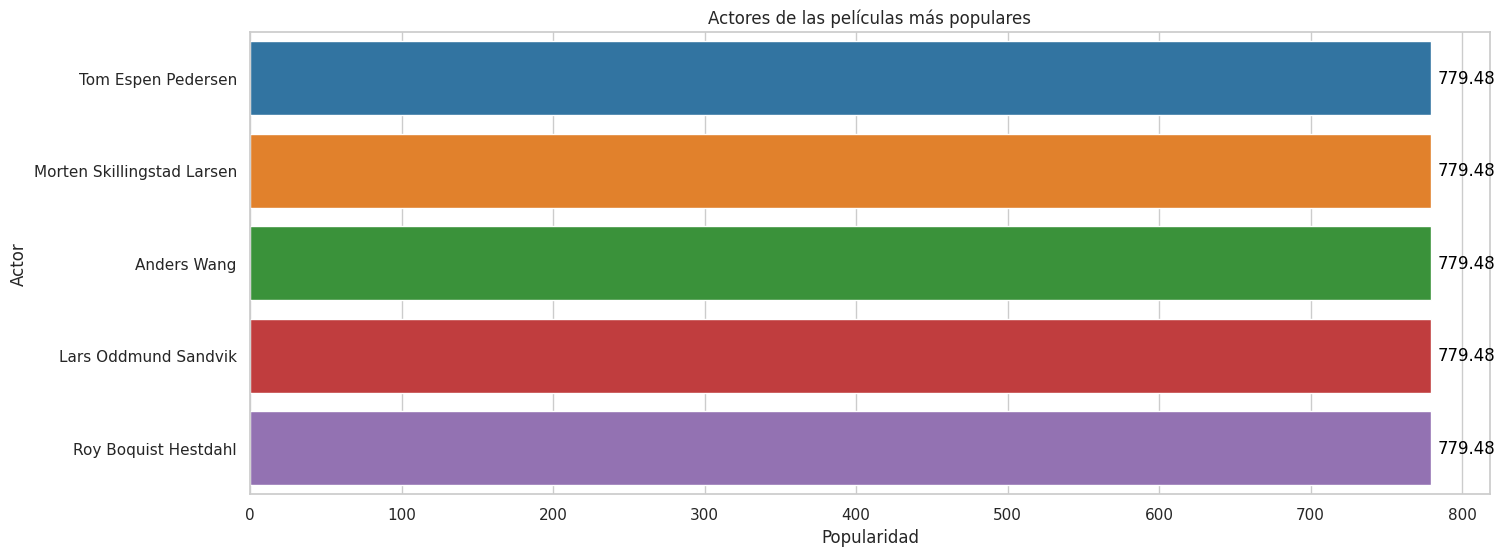

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))

ax = sns.barplot(data=top_actors.head(), y='name', x='tmdb_popularity')
plt.title('Actores de las películas más populares')
plt.xlabel('Popularidad')
plt.ylabel('Actor')

for barra in ax.patches:
    if barra.get_width() > 0:
        x = barra.get_width()
        y = barra.get_y() + barra.get_height() / 2
        etiqueta = f"{round(x, 2)}"
        ax.annotate(etiqueta, (x, y), xytext=(5, 0), textcoords="offset points", va='center', color='black')

plt.show()


### 10. ¿Quiénes son los directores más populares en cada región?

In [53]:
df_directors_popularity = (
    pd.merge(df_credits, df_titles, on="id")
    .sort_values(by= "tmdb_popularity",ascending=False)
    .query("role == 'DIRECTOR'")
    [["name", "production_countries", "tmdb_popularity", "title", "type", ]]
    .assign(production_countries=lambda x: x.production_countries.str.replace("[", "", regex=False).str.replace("]", "", regex=False).str.replace("'", "", regex=False))
)
df_directors_popularity.head()


,name,production_countries,tmdb_popularity,title,type
59099,Erik Skjoldbjærg,NO,779.484,Narvik,MOVIE
68733,Daniel Markowicz,PL,755.987,Lesson Plan,MOVIE
80585,Yeon Sang-ho,KR,598.277,JUNG_E,MOVIE
59572,Matthew Warchus,GB,548.570,Roald Dahl's Matilda the Musical,MOVIE
60400,Roar Uthaug,NO,533.668,Troll,MOVIE


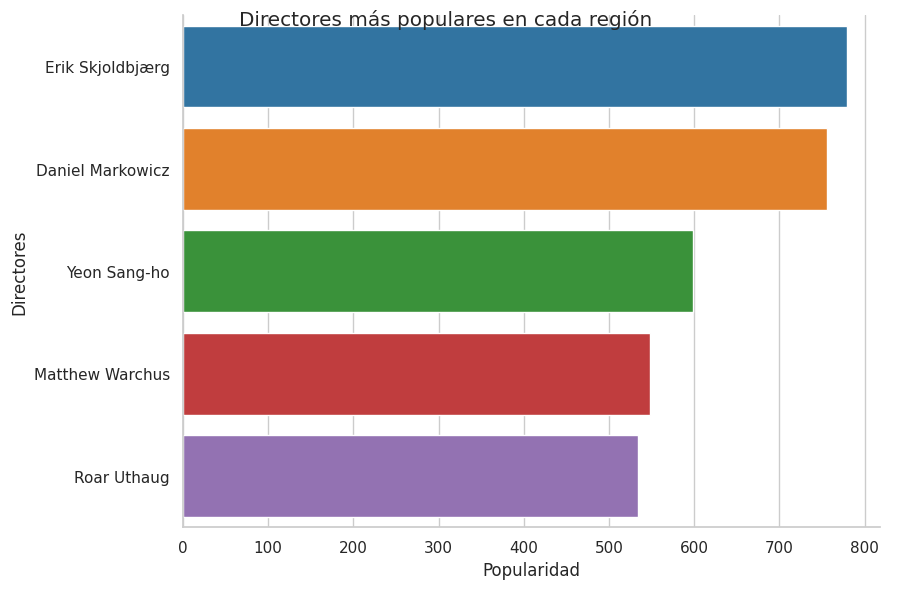

In [100]:
# Create the visualization
sns.set_style('whitegrid')
g = sns.catplot(data=df_directors_popularity.head(), y='name', x='tmdb_popularity',
                kind="bar", height=6, aspect=1.5)
g.fig.suptitle('Directores más populares en cada región')
g.set_xlabels('Popularidad')
g.set_ylabels('Directores')
g.add_legend()
plt.show()

# Add labels to the bars
for ax in g.axes.flat:
    for bar in ax.containers[0].patches:
        x = bar.get_bbox().bounds[2]  # Get the x-coordinate of the top-right corner of the bar
        y = bar.get_y() + bar.get_height() / 2
        label = f"{x:.1f}"
        ax.text(x, y, label, ha='left', va='center', color='black')


### 11. ¿Cuál es la mejor película de cada década según el puntaje de IMDB?

In [55]:
best_movies = []
for decade in range(1950, 2030, 10):
    best_movie_df = (
        df_titles[["title", "release_year", "imdb_score", "type"]]
        .query(f"release_year >= {decade} and release_year < {decade+10} and type == 'MOVIE'")
        .nlargest(1, "imdb_score")


    )
    best_movies.append(best_movie_df)

best_movies = pd.concat(best_movies, ignore_index=True)
best_movies


,title,release_year,imdb_score,type
0,White Christmas,1954,7.5,MOVIE
1,Saladin the Victorious,1963,7.6,MOVIE
2,The Sting,1973,8.3,MOVIE
3,Parrot Sketch Not Included: Twenty Years of Mo...,1989,8.1,MOVIE
4,Forrest Gump,1994,8.8,MOVIE
5,The Dark Knight,2008,9.0,MOVIE
6,C/o Kancharapalem,2018,8.8,MOVIE
7,David Attenborough: A Life on Our Planet,2020,8.9,MOVIE


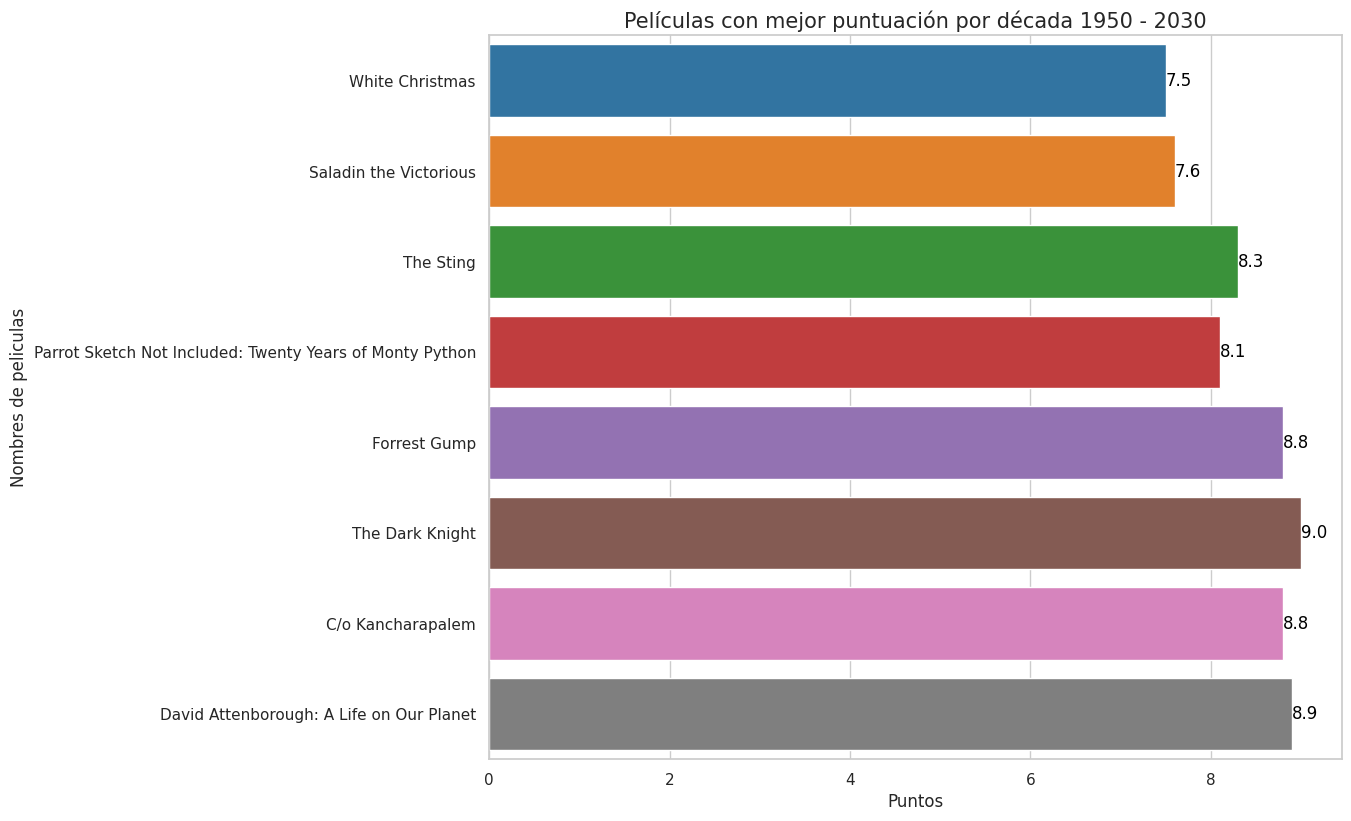

In [56]:
# Crear el gráfico de barras
grafico_barras = sns.barplot(
    data=best_movies,
    y="title",
    x="imdb_score"
)

# Agregar un título al gráfico
plt.title("Películas con mejor puntuación por década 1950 - 2030", fontdict = {"fontsize" : 15}, )

# Agregar labels a los ejes
plt.ylabel("Nombres de peliculas")
plt.xlabel("Puntos")


# Agregar etiquetas a las barras
for barra in grafico_barras.patches:
    x = barra.get_width()
    y = barra.get_y() + barra.get_height() / 2
    etiqueta = f"{float(x)}"
    grafico_barras.text(x, y, etiqueta, ha='left', va='center', color='black')


## Utilizando SQL

### 3. ¿Cuáles son las 10 películas y series más populares según el ranking?

In [57]:
df_8 = _deepnote_execute_sql('SELECT \n    title,\n    imdb_score,\n    type\nFROM \'titles.csv\'\nWHERE imdb_score IS NOT NULL\n    AND type = \'MOVIE\'\nORDER BY imdb_score DESC\nLIMIT 10;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_8

,title,imdb_score,type
0,The Dark Knight,9.0,MOVIE
1,The Lord of the Rings: The Return of the King,9.0,MOVIE
2,David Attenborough: A Life on Our Planet,8.9,MOVIE
3,Split at the Root,8.9,MOVIE
4,Forrest Gump,8.8,MOVIE
5,The Lord of the Rings: The Fellowship of the Ring,8.8,MOVIE
6,The Lord of the Rings: The Two Towers,8.8,MOVIE
7,C/o Kancharapalem,8.8,MOVIE
8,Chhota Bheem Neeli Pahaadi,8.8,MOVIE
9,Nanpakal Nerathu Mayakkam,8.8,MOVIE


In [58]:
DeepnoteChart(df_8, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"title","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"imdb_score","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [59]:
df_9 = _deepnote_execute_sql('SELECT \n    title,\n    imdb_score,\n    type\nFROM \'titles.csv\'\nWHERE imdb_score IS NOT NULL\n    AND type = \'SHOW\'\nORDER BY imdb_score DESC\nLIMIT 10;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_9

,title,imdb_score,type
0,Crazy Delicious,9.6,SHOW
1,#ABtalks,9.6,SHOW
2,Breaking Bad,9.5,SHOW
3,Khawatir,9.5,SHOW
4,Avatar: The Last Airbender,9.3,SHOW
5,The Chosen,9.3,SHOW
6,Our Planet,9.3,SHOW
7,Reply 1988,9.2,SHOW
8,My Mister,9.1,SHOW
9,The Last Dance,9.1,SHOW


In [60]:
DeepnoteChart(df_9, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"title","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"imdb_score","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

### 4. ¿Cuál es el país que produce más contenido en comparación con el país que produce menos contenido?

In [61]:
df_11 = _deepnote_execute_sql('-- Creación de tabla temporal\nWITH counts AS (\n    SELECT \n        -- REGEXP_REPLACE es una función SQL para reemplazar patrones de texto en una cadena usando expresiones regulares. "g" para todos valores.\n        REGEXP_REPLACE(production_countries, \'[\\[\\]\\"]|\\\'\'\', \'\', \'g\') AS production_countries,\n        COUNT(*) AS count  \n    FROM df_titles\n    GROUP BY REGEXP_REPLACE(production_countries, \'[\\[\\]\\"]|\\\'\'\', \'\', \'g\')\n)\n\n-- Consulta a la tabla temporal\nSELECT \n    production_countries, \n    count\nFROM counts\nWHERE count = ( \n        SELECT \n            MAX(count) \n        FROM counts) \n    OR count = (\n        SELECT \n            MIN(count)\n        FROM counts)\nORDER BY \n    count DESC,\n    production_countries DESC\nLIMIT 2;\n', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_11

,production_countries,count
0,US,1981
1,ZW,1


### 5. ¿Qué país produce más contenido, series o películas?

In [62]:
df_11 = _deepnote_execute_sql('\nSELECT\n    REGEXP_REPLACE(production_countries, \'[\\[\\]\\"]|\\\'\'\', \'\', \'g\') AS production_countries,\n    type,\n    COUNT(*) AS production\nFROM \'titles.csv\'\nGROUP BY \n    REGEXP_REPLACE(production_countries, \'[\\[\\]\\"]|\\\'\'\', \'\', \'g\'),\n    type\nORDER BY 3 DESC\nLIMIT 5;\n', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_11

,production_countries,type,production
0,US,MOVIE,1143
1,US,SHOW,838
2,IN,MOVIE,576
3,KR,SHOW,212
4,JP,SHOW,175


### 6. ¿Cuáles son las palabras que más se repiten en la descripción de las películas y series?

In [63]:
df_15 = _deepnote_execute_sql('SELECT *\nFROM frecuencias', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_15

,Palabra,Frecuencia
0,life,907
1,world,647
2,love,632
3,family,623
4,new,603
5,one,587
6,young,561
7,two,503
8,story,424
9,friends,423


In [64]:
df_12 = _deepnote_execute_sql('SELECT\n    description_word,\n    COUNT(*) AS word_count\nFROM (\n    SELECT\n         regexp_split_to_array(description,  \' \') AS description_word\n    FROM \'titles.csv\'\n    ) AS word_table \nGROUP BY description_word\nORDER BY word_count DESC, description_word\nLIMIT 10;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_12

,description_word,word_count
0,None,23
1,"[Away, from, school,, during, the, winter, hol...",2
2,"[Marta, may, be, an, orphan,, and, she, may, b...",2
3,"[""Ali, ileum"", open, safes, talented, thief,, ...",1
4,"[""Bridgerton"", cast, members, share, behind-th...",1
5,"[""Everybody, Loves, Raymond"", creator, Phil, R...",1
6,"[""Frat, Star"", explores, the, alluring,, super...",1
7,"[""Get, your, muzzle, out, of, those, books, an...",1
8,"[""If, you, blush,, you, lose."", Living, by, th...",1
9,"[""King, of, Bollywood"", Shah, Rukh, Khan, open...",1


### 7. ¿Cuál es la película y serie con la mayor duración?

In [102]:
df_13 = _deepnote_execute_sql('SELECT\n    title,\n    type,\n    runtime AS time_in_minutes\nFROM \'titles.csv\'\nWHERE runtime = (\n    SELECT MAX(runtime)\n    FROM \'titles.csv\'\n    WHERE TYPE = \'MOVIE\'\n    )\n    OR runtime = (\n    SELECT MAX(runtime)\n    FROM \'titles.csv\'\n    WHERE TYPE = \'SHOW\'  \n    )\nORDER by runtime desc, title\nLIMIT 2;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_13

,title,type,time_in_minutes
0,A Lion in the House,MOVIE,225
1,A Sinister Sect: Colonia Dignidad,SHOW,209


### 8. ¿Cuáles son las 10 películas y series con mayor número de puntaje?

In [66]:
df_16 = _deepnote_execute_sql('SELECT \n   title,\n   type,\n   imdb_score\nFROM \'titles.csv\'\nWHERE type = \'MOVIE\'\n    AND imdb_score IS NOT NULL\nORDER BY imdb_score DESC\nLIMIT 10;\n\n', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_16

,title,type,imdb_score
0,The Dark Knight,MOVIE,9.0
1,The Lord of the Rings: The Return of the King,MOVIE,9.0
2,David Attenborough: A Life on Our Planet,MOVIE,8.9
3,Split at the Root,MOVIE,8.9
4,Forrest Gump,MOVIE,8.8
5,The Lord of the Rings: The Fellowship of the Ring,MOVIE,8.8
6,The Lord of the Rings: The Two Towers,MOVIE,8.8
7,C/o Kancharapalem,MOVIE,8.8
8,Chhota Bheem Neeli Pahaadi,MOVIE,8.8
9,Nanpakal Nerathu Mayakkam,MOVIE,8.8


In [67]:
df_17 = _deepnote_execute_sql('SELECT \n   title,\n   type,\n   imdb_score\nFROM \'titles.csv\'\nWHERE type = \'SHOW\'\n    AND imdb_score IS NOT NULL\nORDER BY imdb_score DESC\nLIMIT 10;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_17

,title,type,imdb_score
0,Crazy Delicious,SHOW,9.6
1,#ABtalks,SHOW,9.6
2,Breaking Bad,SHOW,9.5
3,Khawatir,SHOW,9.5
4,Avatar: The Last Airbender,SHOW,9.3
5,The Chosen,SHOW,9.3
6,Our Planet,SHOW,9.3
7,Reply 1988,SHOW,9.2
8,My Mister,SHOW,9.1
9,The Last Dance,SHOW,9.1


### 9. ¿Quiénes son los actores y directores de las películas más populares?

In [68]:
df_18 = _deepnote_execute_sql('SELECT\n    t.title AS movie_title,\n    t.type,\n    c.name,\n    c.role,\n    t.tmdb_popularity\nFROM \'titles.csv\' AS t\nINNER JOIN \'credits.csv\' AS c\nON t.id = c.id\nWHERE tmdb_popularity IS NOT NULL\n    AND type = \'MOVIE\'\nORDER BY tmdb_popularity DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_18

,movie_title,type,name,role,tmdb_popularity
0,Narvik,MOVIE,Kristine Cornelie M. Hartgen,ACTOR,779.484
1,Narvik,MOVIE,Carl Martin Eggesbø,ACTOR,779.484
2,Narvik,MOVIE,Christoph Gelfert Mathiesen,ACTOR,779.484
3,Narvik,MOVIE,Henrik Mestad,ACTOR,779.484
4,Narvik,MOVIE,Mathilde Holtedahl Cuhra,ACTOR,779.484
...,...,...,...,...,...
64571,Jolly Roger,MOVIE,Frank Donga,ACTOR,0.600
64572,Jolly Roger,MOVIE,Tina Mba,ACTOR,0.600
64573,Jolly Roger,MOVIE,Toyin Oshinaike,ACTOR,0.600
64574,Jolly Roger,MOVIE,Kunle Oshodi-Glover,ACTOR,0.600


In [69]:
df_19 = _deepnote_execute_sql('SELECT\n    t.title AS serie_title,\n    t.type,\n    c.name,\n    c.role,\n    t.tmdb_popularity\nFROM \'titles.csv\' AS t\nINNER JOIN \'credits.csv\' AS c\nON t.id = c.id\nWHERE tmdb_popularity IS NOT NULL\n    AND type = \'SHOW\'\nORDER BY tmdb_popularity DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_19

,serie_title,type,name,role,tmdb_popularity
0,The Flash,SHOW,Grant Gustin,ACTOR,1078.637
1,The Flash,SHOW,Candice Patton,ACTOR,1078.637
2,The Flash,SHOW,Danielle Nicolet,ACTOR,1078.637
3,The Flash,SHOW,Kayla Compton,ACTOR,1078.637
4,The Flash,SHOW,Brandon McKnight,ACTOR,1078.637
...,...,...,...,...,...
16760,Maid,SHOW,Anika Noni Rose,ACTOR,0.600
16761,Maid,SHOW,Andie MacDowell,ACTOR,0.600
16762,Maid,SHOW,Tracy Vilar,ACTOR,0.600
16763,Maid,SHOW,Billy Burke,ACTOR,0.600


### 10. ¿Quiénes son los directores más populares en cada región?

In [70]:
df_20 = _deepnote_execute_sql('SELECT \n    c.name,\n    REGEXP_REPLACE(t.production_countries, \'[\\[\\]\\"]|\\\'\'\', \'\', \'g\') AS production_countries,\n    MAX(tmdb_popularity) AS popularity,\n    t.title,\n    t.type\nFROM \'credits.csv\' AS c\nINNER JOIN \'titles.csv\' AS t\nON c.id = t.id\nWHERE role = \'DIRECTOR\'\n    AND tmdb_popularity IS NOT NULL\nGROUP BY t.production_countries, c.name, t.title, t.type\nORDER BY popularity DESC;', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_20

,name,production_countries,popularity,title,type
0,Erik Skjoldbjærg,NO,779.484,Narvik,MOVIE
1,Daniel Markowicz,PL,755.987,Lesson Plan,MOVIE
2,Yeon Sang-ho,KR,598.277,JUNG_E,MOVIE
3,Matthew Warchus,GB,548.570,Roald Dahl's Matilda the Musical,MOVIE
4,Roar Uthaug,NO,533.668,Troll,MOVIE
...,...,...,...,...,...
4779,Mugambi Nthiga,"KE, DE",0.600,Lusala,MOVIE
4780,Walter Taylaur,NG,0.600,Jolly Roger,MOVIE
4781,Hany Abu-Assad,PS,0.600,Omar,MOVIE
4782,Ram Gopal Varma,IN,0.600,Dongala Mutha,MOVIE


### 11. ¿Cuál es la mejor película de cada década según el puntaje de IMDB?

In [71]:
df_31 = _deepnote_execute_sql('WITH ranking AS (\nSELECT \n    title, \n    FLOOR(release_year/10)*10 AS decade,\n    release_year,\n    imdb_score,\n    ROW_NUMBER() OVER(PARTITION BY decade ORDER BY imdb_score DESC) AS ranking\n    FROM \'titles.csv\'\n    WHERE type = \'MOVIE\'\n        AND imdb_score IS NOT NULL\n)\n\nSELECT\n    title,\n    decade,\n    release_year,\n    MAX(imdb_score)\nFROM ranking\nWHERE ranking = 1\nGROUP BY decade, title, release_year\nORDER by decade\n', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_31

,title,decade,release_year,max(imdb_score)
0,White Christmas,1950.0,1954,7.5
1,Saladin the Victorious,1960.0,1963,7.6
2,The Sting,1970.0,1973,8.3
3,Parrot Sketch Not Included: Twenty Years of Mo...,1980.0,1989,8.1
4,Forrest Gump,1990.0,1994,8.8
5,The Dark Knight,2000.0,2008,9.0
6,C/o Kancharapalem,2010.0,2018,8.8
7,Split at the Root,2020.0,2022,8.9


In [72]:
df_21 = _deepnote_execute_sql('WITH ranking AS (\nSELECT \n    title, \n    FLOOR(release_year/10)*10 AS decade,\n    release_year,\n    imdb_score,\n    ROW_NUMBER() OVER(PARTITION BY decade ORDER BY imdb_score DESC) AS ranking\n    FROM \'titles.csv\'\n    WHERE type = \'SHOW\'\n        AND imdb_score IS NOT NULL\n)\n\nSELECT\n    title,\n    decade,\n    release_year,\n    MAX(imdb_score)\nFROM ranking\nWHERE ranking = 1\nGROUP BY decade, title, release_year\nORDER by decade', 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_21

,title,decade,release_year,max(imdb_score)
0,Monty Python's Flying Circus,1960.0,1969,8.8
1,Monty Python's Fliegender Zirkus,1970.0,1972,8.1
2,Seinfeld,1980.0,1989,8.9
3,One Piece,1990.0,1999,8.9
4,Breaking Bad,2000.0,2008,9.5
5,Crazy Delicious,2010.0,2017,9.6
6,Story Time Book: Read-Along,2020.0,2022,9.1


# Comunicar los resultados
Comunica los resultados del análisis de datos de manera clara y efectiva. Esto puede incluir la creación de gráficos y visualizaciones, la redacción de informes detallados o la presentación de los resultados a un público específico.

Entre los hallazgos más destacados se encuentran:

- Se ha observado que los usuarios tienden a otorgar una calificación más alta a las series que a las peliculas.
- Se pudo observar que las películas con la duración más larga fueron "A Lion in the House", "A Sinister Sect: Colonia Dignidad" y "The Irishman".
- Se puede observar que, de acuerdo con las puntuaciones, "The Dark Knight" es la mejor película de las últimas siete décadas.
- Se observa una clara predominancia de los Estados Unidos en cuanto a la producción de películas y series, no obstante, es importante destacar que el director más popular en este ámbito proviene de Noruega (NO).



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e73733a-d573-49c1-af1e-6fa2f6783aea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>